In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df= pd.read_csv("insurance_data - insurance_data.csv")

In [4]:
df.head()

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


In [5]:
df.shape

(1340, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1340 non-null   int64  
 1   PatientID      1340 non-null   int64  
 2   age            1335 non-null   float64
 3   gender         1340 non-null   object 
 4   bmi            1340 non-null   float64
 5   bloodpressure  1340 non-null   int64  
 6   diabetic       1340 non-null   object 
 7   children       1340 non-null   int64  
 8   smoker         1340 non-null   object 
 9   region         1337 non-null   object 
 10  claim          1340 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 115.3+ KB


In [7]:
df.isna().sum()

index            0
PatientID        0
age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

In [8]:
df.drop(columns= ['index'],inplace= True)

In [9]:
df.head()

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


In [10]:
df.set_index('PatientID', inplace= True)
df.head()

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
PatientID,,,,,,,,,
1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
2,24.0,male,30.1,87,No,0,No,southeast,1131.51
3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
4,NaN,male,33.7,80,No,0,No,northwest,1136.40
5,NaN,male,34.1,100,No,0,No,northwest,1137.01


In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.columns

Index(['age', 'gender', 'bmi', 'bloodpressure', 'diabetic', 'children',
       'smoker', 'region', 'claim'],
      dtype='object')

margin= round(len(df)*0.05,2)
margin

df.dropna(subset= df.columns[df.isna().sum()<= margin], inplace= True)

df.isna().sum()

In [13]:
df.age.isna().sum()

np.int64(5)

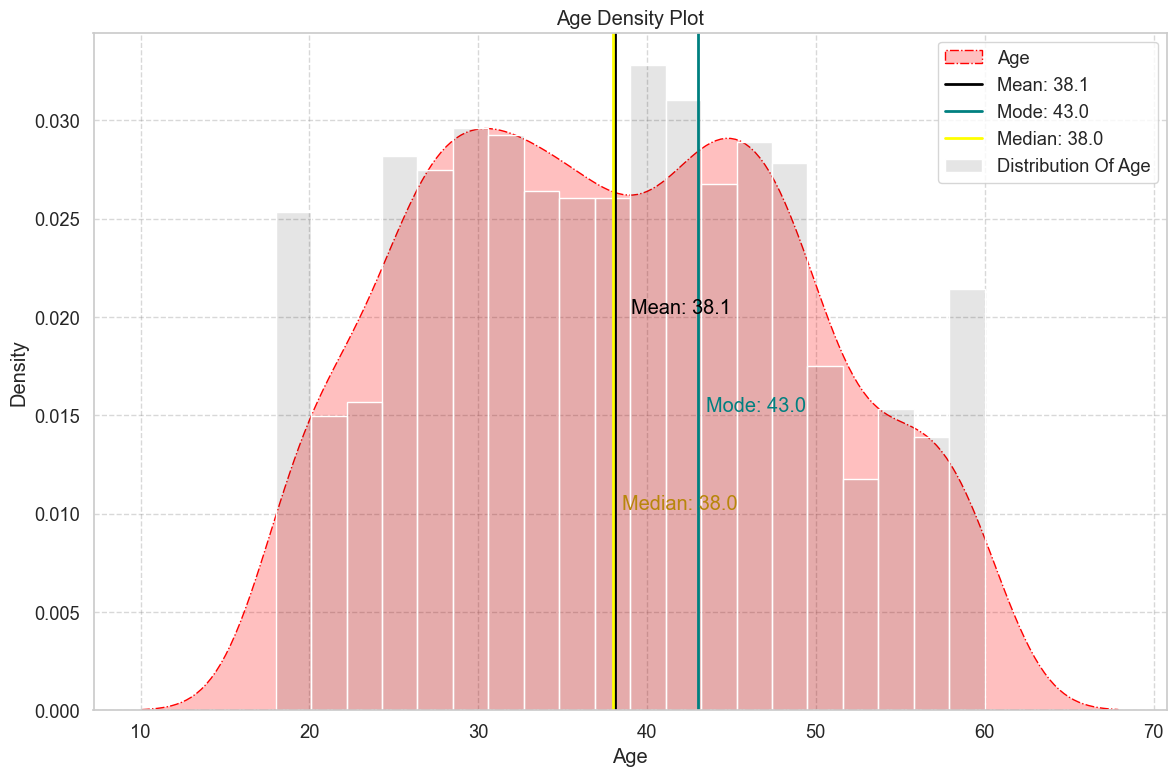

In [14]:
sns.set_theme(style="whitegrid", palette="muted", font_scale=1.2)
plt.figure(figsize= (12, 8))
sns.kdeplot(df.age,fill= True, label= "Age", linewidth= 1, linestyle= "-.", color= "red")
[plt.axvline(i, label= j, linewidth= 2, linestyle= k, color= l) for i, j, k, l in [(df.age.mean(), f"Mean: {round(df.age.mean(),1)}", "-", "black"), (df.age.mode().iloc[0], f"Mode: {df.age.mode().iloc[0]}", "-","teal"), (df.age.median(), f"Median: {df.age.median()}", "-", "yellow")]]

sns.histplot(df.age, kde=False, stat="density", bins=20, alpha=0.1, color= "black", label= "Distribution Of Age")

plt.text(df.age.mean() + 1, 0.02, f"Mean: {df.age.mean():.1f}", rotation= 0, color="black", va='bottom', ha='left')
plt.text(df.age.mode().iloc[0] + 0.5, 0.015, f"Mode: {df.age.mode().iloc[0]:.1f}", rotation= 0, color="teal", va='bottom', ha='left')
plt.text(df.age.median() + 0.5, 0.01, f"Median: {df.age.median():.1f}", rotation= 0, color="#b8860b", va='bottom', ha='left')

plt.grid(True, linewidth= 1, linestyle= '--', color= "grey", alpha= 0.3)

plt.title("Age Density Plot")
plt.xlabel("Age")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()

In [15]:
df.age.fillna(round(df.age.mean(),2), inplace= True)

In [16]:
df.isna().sum()

age              0
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

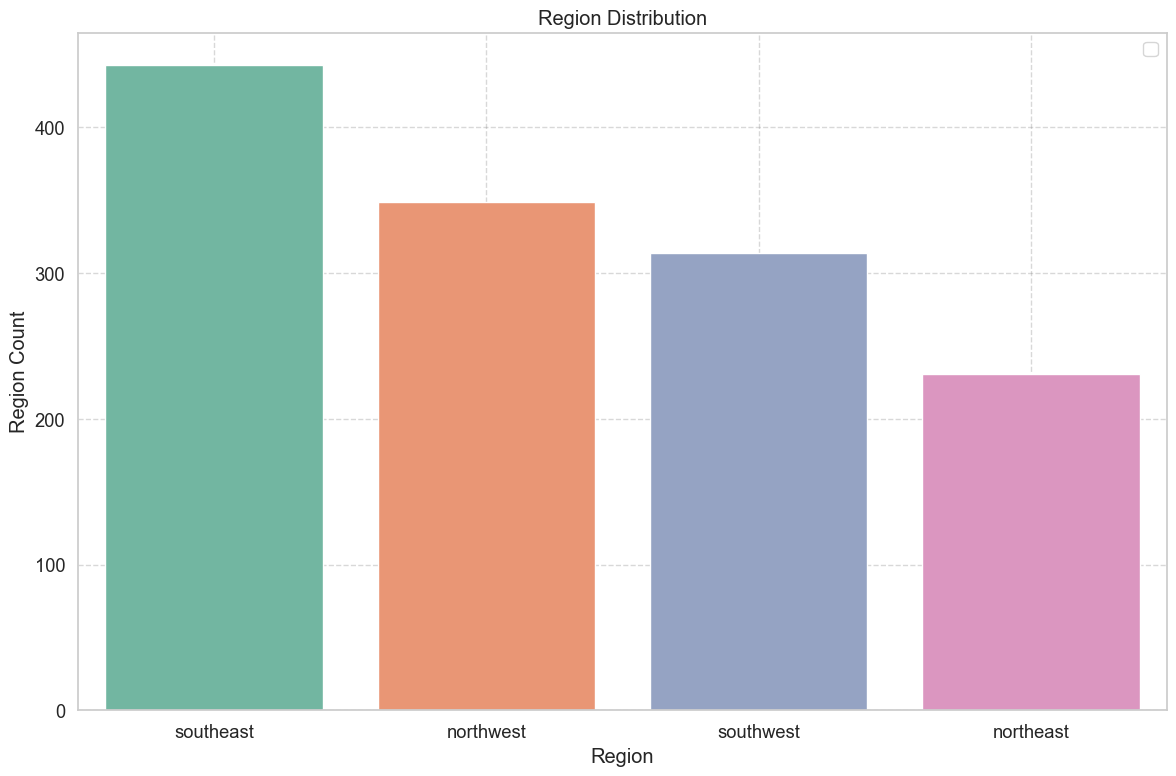

In [17]:
plt.figure(figsize= (12,8))
sns.countplot(x= 'region', data= df, palette= "Set2")

plt.grid(True, linewidth= 1, linestyle= "--", color= "grey", alpha= 0.3)

plt.title("Region Distribution")
plt.xlabel("Region")
plt.ylabel("Region Count")
plt.legend()
plt.tight_layout()
plt.show()

In [18]:
df.region.fillna(df.region.mode().iloc[0], inplace= True)

In [19]:
df.isna().sum()

age              0
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           0
claim            0
dtype: int64

In [20]:
len(df.index.unique())

1340

In [21]:
df.shape

(1340, 9)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1340 entries, 1 to 1340
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1340 non-null   float64
 1   gender         1340 non-null   object 
 2   bmi            1340 non-null   float64
 3   bloodpressure  1340 non-null   int64  
 4   diabetic       1340 non-null   object 
 5   children       1340 non-null   int64  
 6   smoker         1340 non-null   object 
 7   region         1340 non-null   object 
 8   claim          1340 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 137.0+ KB


In [23]:
df.gender.unique()

array(['male', 'female'], dtype=object)

In [24]:
df.region.unique()

array(['southeast', 'northwest', 'southwest', 'northeast'], dtype=object)

In [25]:
df.diabetic.unique()

array(['Yes', 'No'], dtype=object)

In [26]:
df.smoker.unique()

array(['No', 'Yes'], dtype=object)

In [27]:
df.children.unique()

array([0, 1, 2, 3, 4, 5])

In [28]:
change= {
    "Yes": True,
    "No": False
}

df[['diabetic', 'smoker']]= df[['diabetic', 'smoker']].replace(change).infer_objects(copy= False)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1340 entries, 1 to 1340
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1340 non-null   float64
 1   gender         1340 non-null   object 
 2   bmi            1340 non-null   float64
 3   bloodpressure  1340 non-null   int64  
 4   diabetic       1340 non-null   bool   
 5   children       1340 non-null   int64  
 6   smoker         1340 non-null   bool   
 7   region         1340 non-null   object 
 8   claim          1340 non-null   float64
dtypes: bool(2), float64(3), int64(2), object(2)
memory usage: 118.7+ KB


In [31]:
df.isna().sum()

age              0
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           0
claim            0
dtype: int64

In [32]:
df.duplicated().sum()

np.int64(0)